# I2Thor


## Setup

In [98]:
!pip install --upgrade ai2thor --quiet
!pip install ai2thor-colab prior --upgrade &> /dev/null

In [99]:
import os
os.system('apt-get install xvfb')

0

In [100]:
import prior

dataset = prior.load_dataset("procthor-10k")
dataset

[AI2-THOR WARNING] There has been an update to ProcTHOR-10K that must be used with AI2-THOR version 5.0+. To use the new version of ProcTHOR-10K, please update AI2-THOR to version 5.0+ by running:
    pip install --upgrade ai2thor
Alternatively, to downgrade to the old version of ProcTHOR-10K, run:
   prior.load_dataset("procthor-10k", revision="ab3cacd0fc17754d4c080a3fd50b18395fae8647")


Loading test: 100%|██████████| 1000/1000 [00:00<00:00, 1142.01it/s]


DatasetDict(
    train=Dataset(
    dataset=procthor-dataset,
    size=10000,
    split=train
),
    val=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=val
),
    test=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=test
)
)

In [101]:
#import sys
#sys.path.append('/home/matt/Dev/ComBots/combots_venv/lib/python3.12/site-packages')
#import prior


#import prior

#dataset = prior.load_dataset("procthor-10k")
#dataset

In [102]:
import ai2thor_colab
ai2thor_colab.start_xserver()

In [103]:
house = dataset["train"][11]

In [104]:
from ai2thor.controller import Controller

In [105]:

controller = Controller(scene=house, visibilityDistance=10, width=750, height=750)

## Moving around

In [106]:
from PIL import Image
#Image.fromarray(controller.last_event.frame)

In [107]:
#controller.step("RotateRight") # or "RotateLeft"

In [108]:
#controller.step("MoveAhead") # or "MoveBack", "MoveLeft", "MoveRight"

In [97]:
event = controller.step(action="GetReachablePositions")
reachable_positions = event.metadata["actionReturn"]
#event.metadata["actionReturn"]

BrokenPipeError: [Errno 32] Broken pipe

In [79]:
unique_object_list = [
"AlarmClock",
"AluminumFoil",
"Apple",
"ArmChair",
"BaseballBat",
"BasketBall",
"Bathtub",
"BathtubBasin",
"Bed",
"Blinds",
"Book",
"Boots",
"Bottle",
"Bowl",
"Box",
"Bread",
"ButterKnife",
"Cabinet",
"Candle",
"CD",
"CellPhone",
"Chair",
"Cloth",
"CoffeeMachine",
"CoffeeTable",
"CounterTop",
"CreditCard",
"Cup",
"Curtains",
"Desk",
"DeskLamp",
"Desktop",
"DiningTable",
"DishSponge",
"DogBed",
"Drawer",
"Dresser",
"Dumbbell",
"Egg",
"Faucet",
"Floor",
"FloorLamp",
"Footstool",
"Fork",
"Fridge",
"GarbageBag",
"GarbageCan",
"HandTowel",
"HandTowelHolder",
"HousePlant",
"Kettle",
"KeyChain",
"Knife",
"Ladle",
"Laptop",
"LaundryHamper",
"Lettuce",
"LightSwitch",
"Microwave",
"Mirror",
"Mug",
"Newspaper",
"Ottoman",
"Painting",
"Pan",
"PaperTowelRoll",
"Pen",
"Pencil",
"PepperShaker",
"Pillow",
"Plate",
"Plunger",
"Poster",
"Pot",
"Potato",
"RemoteControl",
"RoomDecor",
"Safe",
"SaltShaker",
"ScrubBrush",
"Shelf",
"ShelvingUnit",
"ShowerCurtain",
"ShowerDoor",
"ShowerGlass",
"ShowerHead",
"SideTable",
"Sink",
"SinkBasin",
"SoapBar",
"SoapBottle",
"Sofa",
"Spatula",
"Spoon",
"SprayBottle",
"Statue",
"Stool",
"StoveBurner",
"StoveKnob",
"TableTopDecor",
"TargetCircle",
"TeddyBear",
"Television",
"TennisRacket",
"TissueBox",
"Toaster",
"Toilet",
"ToiletPaper",
"ToiletPaperHanger",
"Tomato",
"Towel",
"TowelHolder",
"TVStand",
"VacuumCleaner",
"Vase",
"Watch",
"WateringCan",
"Window",
"WineBottle"
]

#MY STUFF

TELEPORT SOMEWHERE RANDOM

Teleporting the agent to {'x': 0.25, 'y': 0.9009997844696045, 'z': 4.25}  with rotation 203


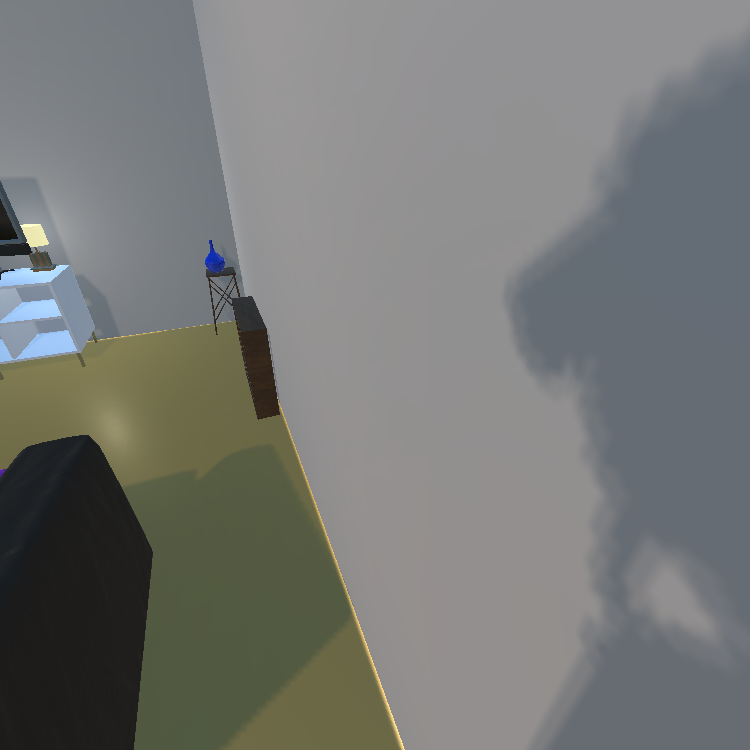

In [81]:
import random

position = random.choice(reachable_positions)
rotation = random.choice(range(360))
print("Teleporting the agent to", position, " with rotation", rotation)

event = controller.step(action="Teleport", position=position, rotation=rotation)

Image.fromarray(event.frame)

IMAGE WITH 2 PAINTING

In [64]:
event = controller.step(action="Teleport", position={'x': 2.5, 'y': 0.9009997844696045, 'z': 4.5}, rotation=80)

Image.fromarray(event.frame)

TimeoutError: Error encountered when running action {'action': 'Teleport', 'position': {'x': 2.5, 'y': 0.9009997844696045, 'z': 4.5}, 'rotation': {'y': 80}, 'sequenceId': 7} in scene Procedural.

In [25]:
!pip install python-dotenv

In [42]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# OpenAI API Key
api_key = os.getenv("OPENAI_API_KEY")


In [43]:
from openaiapi import analyze_prompt, analyze_image
from utils import numpy_to_base64

frame = controller.last_event.frame
base64_string = numpy_to_base64(frame)

In [54]:
frame = controller.last_event.frame
base64_string = numpy_to_base64(frame)
#analyze_image(base64_string, api_key=api_key)
#analyze_prompt(api_key=api_key, prompt = "your momma", model="gpt-4o-mini")

In [62]:
import math

def teleport_in_front_of_object(controller, object_position, reachable_positions, distance=1.0):
  """Teleports the agent to the closest reachable position in front of an object.

  Args:
    controller: The AI2Thor controller.
    object_position: The position of the target object.
    reachable_positions: A list of reachable positions in the scene.
    distance: The desired distance in front of the object.

  Returns:
    The event after teleporting.
  """

  # Calculate the target position in front of the object
  target_position = {
      "x": object_position["x"] - distance,
      "y": object_position["y"],
      "z": object_position["z"]
  }

  # Find the closest reachable position
  closest_position = None
  min_distance = float('inf')

  for position in reachable_positions:
    dist = math.sqrt((position["x"] - target_position["x"])**2 +
                     (position["z"] - target_position["z"])**2)
    if dist < min_distance:
      min_distance = dist
      closest_position = position

# Calculate rotation towards the object
  dx = object_position["x"] - closest_position["x"]
  dz = object_position["z"] - closest_position["z"]
  rotation = math.degrees(math.atan2(dx, dz))

  # Teleport and rotate
  event = controller.step(action="Teleport", position=closest_position, rotation=rotation)

  return event  # Return the event after adjusting view angle

In [60]:
def get_object_positions(controller, matched_object):
  """
  Finds the positions of all visible objects of a specific type.

  Args:
    controller: The AI2Thor controller.
    matched_object: The type of object to find (e.g., "Painting", "Chair", "Table").

  Returns:
    A list of positions for the specified object type.
  """
  visible_objects = [obj for obj in controller.last_event.metadata["objects"] if obj["visible"]]
  objects_of_interest = [obj for obj in visible_objects if obj["objectType"] == matched_object]
  object_positions = []
  for obj in objects_of_interest:
      #print(obj["name"], obj["position"])
      object_positions.append(obj["position"])
  return object_positions

In [ ]:
visible_objects = [obj for obj in controller.last_event.metadata["objects"] if obj["visible"]]
paintings = [obj for obj in visible_objects if obj["objectType"] == "Painting"]
painting_positions = []
for painting in paintings:
    print(painting["name"], painting["position"])
    painting_positions.append(painting["position"])


Painting|2|6 {'x': 8.383004188537598, 'y': 1.8958626985549927, 'z': 2.2807140350341797}
Painting|3|6 {'x': 5.0281662940979, 'y': 1.585843563079834, 'z': 7.616852760314941}


In [ ]:
visible_objects = [obj for obj in controller.last_event.metadata["objects"] if obj["visible"]]
paintings = [obj for obj in visible_objects if obj["objectType"] == "Painting"]
all_painting_positions = []  # To store all painting positions

for _ in range(3):  # Rotate three times
    # Get visible paintings and their positions
    current_painting_positions = []
    for painting in paintings:
        print(painting["name"], painting["position"])
        current_painting_positions.append(painting["position"])

    # Add current painting positions to the overall list
    all_painting_positions.extend(current_painting_positions)

    # Rotate the agent
    controller.step("RotateRight")

    # Update visible objects and paintings for the next iteration
    visible_objects = [obj for obj in controller.last_event.metadata["objects"] if obj["visible"]]
    paintings = [obj for obj in visible_objects if obj["objectType"] == "Painting"]

print("All painting positions in the room:", all_painting_positions)

Painting|2|6 {'x': 8.383004188537598, 'y': 1.8958626985549927, 'z': 2.2807140350341797}
Painting|3|6 {'x': 5.0281662940979, 'y': 1.585843563079834, 'z': 7.616852760314941}
Painting|3|5 {'x': 0.004995774477720261, 'y': 1.3465479612350464, 'z': 4.775585651397705}
All painting positions in the room: [{'x': 8.383004188537598, 'y': 1.8958626985549927, 'z': 2.2807140350341797}, {'x': 5.0281662940979, 'y': 1.585843563079834, 'z': 7.616852760314941}, {'x': 0.004995774477720261, 'y': 1.3465479612350464, 'z': 4.775585651397705}]


Painting|3|6 {'x': 5.0281662940979, 'y': 1.585843563079834, 'z': 7.616852760314941}


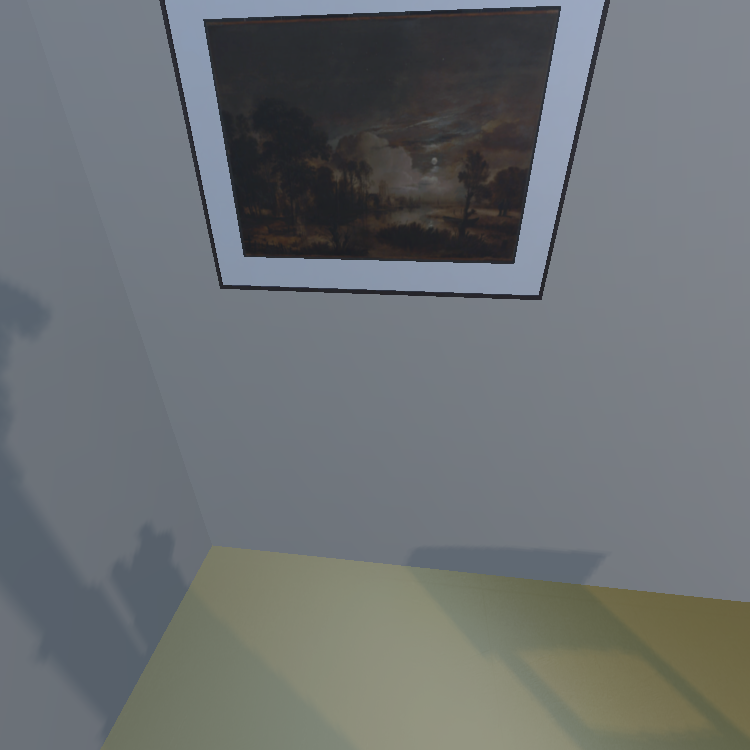

In [63]:
# Teleport to the first painting
event = controller.step(action="GetReachablePositions")
reachable_positions = event.metadata["actionReturn"]

#painting_position = painting_positions[0]
#painting_position = all_painting_positions[1]
painting_position = get_object_positions(controller, "Painting")[0]

event = teleport_in_front_of_object(controller, painting_position, reachable_positions)
Image.fromarray(event.frame)

In [ ]:
#controller.step("LookDown")
#Image.fromarray(controller.last_event.frame)

# We could probably do this automatically, but we could also ask user to ask robot to look up or down

# But think about if this would even be necessary? its just for the gpt4o system to describe it a tiny bit better which may be redundant

# after we take look up or down we should return to the original state, THIS IS IMPORTANT OTHERWISE IT WILL MESS WITH TELEPORTING

## Events

After each action (eg. "MoveAhead", "RotateRight"...) an `Event` is returned. It contains a lot of information that could be useful for your project. The very first action after you've instantiated the controller is always "CreateHouse". You can access the `Event` data for this action as follows:

In [ ]:
controller.last_event

<ai2thor.server.Event at 0x75832c0e5130
    .metadata["lastAction"] = Teleport
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

We can also get an image of what the most recent scene looks like (i.e. what the robot can see). To do this, we need to use `.frame`. This gives us the RGB frame of the scene, in a numpy array:

In [ ]:
controller.last_event.frame

array([[[180, 181, 165],
        [177, 180, 164],
        [177, 180, 164],
        ...,
        [134, 141, 132],
        [133, 142, 133],
        [132, 141, 132]],

       [[180, 180, 166],
        [178, 180, 165],
        [177, 180, 164],
        ...,
        [136, 143, 131],
        [135, 143, 135],
        [133, 142, 133]],

       [[180, 181, 166],
        [178, 181, 165],
        [176, 180, 162],
        ...,
        [135, 142, 133],
        [136, 143, 136],
        [134, 142, 134]],

       ...,

       [[145, 139, 113],
        [145, 139, 114],
        [146, 140, 114],
        ...,
        [ 78,  97, 118],
        [ 79, 100, 122],
        [ 81, 103, 124]],

       [[145, 139, 114],
        [145, 121,  83],
        [145, 122,  84],
        ...,
        [ 77,  97, 117],
        [ 78,  97, 118],
        [ 79, 100, 121]],

       [[145, 122,  84],
        [145, 121,  84],
        [145, 121,  83],
        ...,
        [ 77,  97, 117],
        [ 77,  97, 117],
        [ 78,  97, 118]]

We can also easily turn this numpy array into an image:

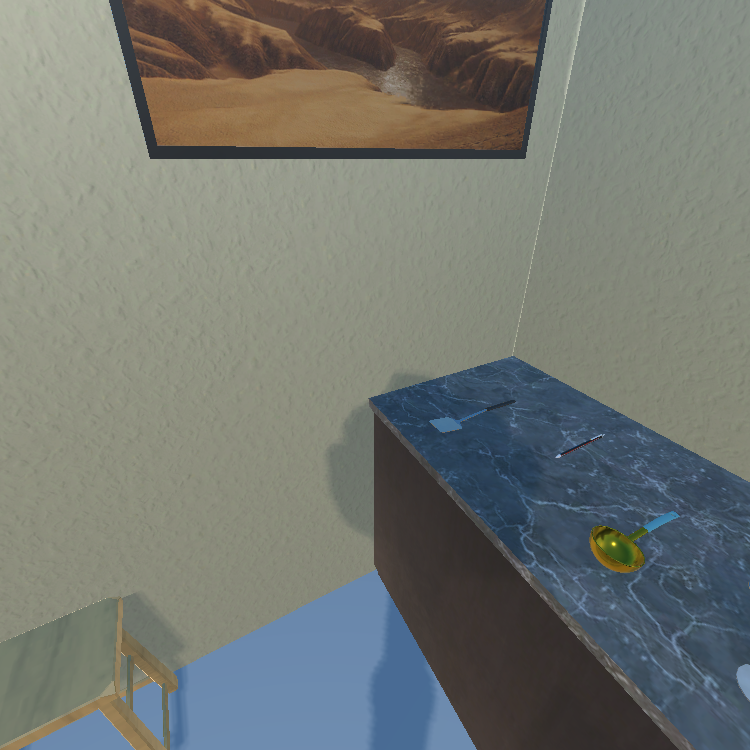

In [ ]:
Image.fromarray(controller.last_event.frame)

One very important type of data you can get from this is the `.metadata`. It contains information on for example the agent's current position and rotation, as well as all objects in the current view, including a lot of object properties. Let's first look at the information about the agent:

In [ ]:
controller.last_event.metadata["agent"]

{'name': 'agent',
 'position': {'x': 7.5, 'y': 0.9009993672370911, 'z': 2.75},
 'rotation': {'x': -0.0, 'y': 117.98908996582031, 'z': 0.0},
 'cameraHorizon': 30.000003814697266,
 'isStanding': True,
 'inHighFrictionArea': False}

Now let's look at the objects in the metadata:

In [ ]:
for object in controller.last_event.metadata["objects"]:
  print(object["name"])

Book|surface|3|14
Bowl|surface|3|10
Candle|surface|3|9
Chair|3|1|5
Chair|3|1|4
Chair|3|1|3
Chair|3|1|2
Chair|3|1|1
CounterTop|2|0
Cup|surface|2|8
DeskLamp|surface|3|12
DiningTable|3|1|0
door|2|3
door|1|3
room|3
Floor
room|2
Fridge|2|1
HousePlant|2|3|0
KeyChain|surface|3|11
Ladle|surface|2|3
Painting|2|6
Painting|3|6
Painting|3|5
Pen|surface|2|0
Pillow|surface|3|13
Shelf (3)
Shelf (1)
Shelf (2)
Shelf (3)
Shelf (4)
Shelf (6)
Shelf (5)
Shelf (1)
Shelf (5)
Shelf (4)
Shelf (2)
Shelf (5)
Shelf
Shelf (1)
Shelf (6)
Shelf (3)
Shelf (5)
Shelf (2)
Shelf (4)
Shelf (4)
Shelf (2)
Shelf
Shelf (6)
Shelf (1)
Shelf (3)
ShelvingUnit|3|3
ShelvingUnit|2|2
ShelvingUnit|3|4
SideTable|3|2
SoapBottle|surface|2|2
Sofa|3|0|1
Spatula|surface|2|6
Spatula|surface|2|5
Spoon|surface|2|4
SprayBottle|surface|2|1
Stool|2|4
Television|2|5
Television|3|0|2
TVStand|3|0|0
Vase|surface|3|15
Vase|surface|2|7
wall|3|5.03|1.68|5.03|5.03
wall|2|5.03|1.68|5.03|5.03
wall|2|5.03|5.03|8.39|5.03
wall|2|8.39|1.68|8.39|5.03
wall|2|5.03

You probably noticed that there are quite a few objects that you cannot actually see if you look at the visualization of the current frame. This is because all objects that are visible (i.e. not hidden behind something) and within the `visibilityDistance` (specified when we initialized the controller) are shown. If you only want the objects that the robot can actually see, you need to only pick objects with `visible=True` (visible being one of the object attributes).

In [ ]:
for object in controller.last_event.metadata["objects"]:
  if object["visible"]:
    print(object["name"])

CounterTop|2|0
Ladle|surface|2|3
Painting|2|6
Pen|surface|2|0
Spatula|surface|2|5
Spoon|surface|2|4
Stool|2|4
wall|2|8.39|1.68|8.39|5.03
wall|2|5.03|1.68|8.39|1.68
wall|exterior|8.39|1.68|8.39|5.03


Finally, let's look at what other properties the currently visible objects have:

In [ ]:
for object in controller.last_event.metadata["objects"]:
  if object["visible"]:
    print(object)

{'name': 'CounterTop|2|0', 'position': {'x': 8.361964225769043, 'y': 2.9802322387695312e-08, 'z': 1.7049989700317383}, 'rotation': {'x': -0.0, 'y': 0.0, 'z': 0.0}, 'visible': True, 'isInteractable': True, 'receptacle': True, 'toggleable': False, 'isToggled': False, 'breakable': False, 'isBroken': False, 'canFillWithLiquid': False, 'isFilledWithLiquid': False, 'fillLiquid': None, 'dirtyable': False, 'isDirty': False, 'canBeUsedUp': False, 'isUsedUp': False, 'cookable': False, 'isCooked': False, 'temperature': 'RoomTemp', 'isHeatSource': False, 'isColdSource': False, 'sliceable': False, 'isSliced': False, 'openable': False, 'isOpen': False, 'openness': 0.0, 'pickupable': False, 'isPickedUp': False, 'moveable': False, 'mass': 0.0, 'salientMaterials': None, 'receptacleObjectIds': ['Spatula|surface|2|5', 'Ladle|surface|2|3', 'Pen|surface|2|0', 'Cup|surface|2|8', 'Spoon|surface|2|4', 'SoapBottle|surface|2|2', 'Spatula|surface|2|6', 'SprayBottle|surface|2|1'], 'distance': 1.6269017457962036, 

## Test Interaction

###Room description

In [48]:
human_room_description = "there is a table. 5 chairs. wthere is a window. its probably a living room."

In [51]:
# claryfying questions
analyze_prompt(api_key=api_key, model = "gpt-4o-mini", prompt=f"Imagine you are a robot who needs to be on a exact location as the point of view that the human has. After a while, the human can no longer see this image. The human will most likely describe a room from memory. The human will most likely describe a few objects and maybe some other attributes, like colours of objects. Your task is to ask claryfing questions about the room and objects so that you (the robot) has the highest chance of finding where the human was standing. Remember, ask the questions as if you were directly talking to the human. Try not to ask for too much details and dont ask for too much; remember, the human has to describe the image from memory, so only ask what you deem most important. \n Human description: {human_room_description}")

({'id': 'chatcmpl-AVge9ja9kz8N1XFSGQ24KPTrOrBm2',
  'object': 'chat.completion',
  'created': 1732115465,
  'model': 'gpt-4o-mini-2024-07-18',
  'choices': [{'index': 0,
    'message': {'role': 'assistant',
     'content': 'Thank you for your description! To help me find the exact location you were standing, could you tell me a bit more about the table? What shape is it, and what color is it? Also, what materials do the chairs seem to be made of? Any additional details about the window would be helpful too, like its size or what you can see outside.',
     'refusal': None},
    'logprobs': None,
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 184,
   'completion_tokens': 73,
   'total_tokens': 257,
   'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0},
   'completion_tokens_details': {'reasoning_tokens': 0,
    'audio_tokens': 0,
    'accepted_prediction_tokens': 0,
    'rejected_prediction_tokens': 0}},
  'system_fingerprint': 'fp_0705bf87c0'},
 1.37194824218

### Object description

In [56]:
human_obj_description = "It's a dark painting with trees a moon. some clouds, a river."

In [52]:
import re

def interactive_object_match(api_key: str, human_object_description: str, unique_object_list: list):
    """
    Interactively matches a human description of an object to one from a given list using an LLM.
    The function continues to refine guesses based on user confirmation or denial.

    Args:
        api_key (str): The API key for accessing the LLM.
        human_object_description (str): A description of the object to match.
        unique_object_list (list): The list of unique objects to match against.

    Returns:
        str: The confirmed object from the user.
        list: The matched object(s) from the list based on the LLM's response.
    """
    def ask_llm(description: str, objects: list) -> str:
        """Helper function to query the LLM for matching the description."""
        object_list_str = ", ".join(objects)
        prompt = (
            f"Imagine you are tasked with identifying an object from a given list based on its description. "
            f"The list of objects is: {object_list_str}. "
            f"Your task is to match the following description to one or more objects from the list: \n"
            f"'{description}'\n\n"
            "If you have a single best guess, respond with: 'To be sure, would you describe your object as {object}?'\n"
            "If you are unsure and need clarification between a few options, respond with: "
            "'To be sure, would you describe your object as {object1} or {object2}?'"
            "Only use objects from the list."
        )
        # Make sure the response is extracted correctly from the LLM
        llm_response = analyze_prompt(api_key=api_key, prompt=prompt)
        if isinstance(llm_response, dict) and "choices" in llm_response:
            return llm_response["choices"][0]["message"]["content"]
        return llm_response  # Return raw response if format is unexpected

    current_description = human_object_description

    while True:
        # Query the LLM for a guess
        response = ask_llm(current_description, unique_object_list)
        print(response)

        # Extract the matched object(s) from the response
        matched_objects = re.findall(r"\b(" + "|".join(map(re.escape, unique_object_list)) + r")\b", response)

        if matched_objects:
            print(f"Matched object(s): {matched_objects}")
        else:
            print("No matched objects found in the response.")

        # Ask the user for confirmation or denial
        user_input = input("Is this correct? (yes/no): ").strip().lower()

        if user_input == "yes":
            print("Great! Object successfully matched.")
            return matched_objects[0] if len(matched_objects) == 1 else matched_objects
        elif user_input == "no":
            print("Let's refine the search.")
            # Ask for more details to refine the description
            clarifying_question = input("Can you provide more details or clarify the description?: ").strip()
            current_description += " " + clarifying_question
        else:
            print("Please respond with 'yes' or 'no'.")

# Example usage
human_object_description = "a leafy green item used for decoration or air purification"
unique_object_list = [
    "AlarmClock", "AluminumFoil", "Apple", "ArmChair", "BaseballBat", "BasketBall",
    "Bathtub", "BathtubBasin", "Bed", "Blinds", "Book", "Boots", "Bottle", "Bowl",
    "Box", "Bread", "ButterKnife", "Cabinet", "Candle", "CD", "CellPhone", "Chair",
    "Cloth", "CoffeeMachine", "CoffeeTable", "CounterTop", "CreditCard", "Cup",
    "Curtains", "Desk", "DeskLamp", "Desktop", "DiningTable", "DishSponge", "DogBed",
    "Drawer", "Dresser", "Dumbbell", "Egg", "Faucet", "Floor", "FloorLamp",
    "Footstool", "Fork", "Fridge", "GarbageBag", "GarbageCan", "HandTowel",
    "HandTowelHolder", "HousePlant", "Kettle", "KeyChain", "Knife", "Ladle", "Laptop",
    "LaundryHamper", "Lettuce", "LightSwitch", "Microwave", "Mirror", "Mug",
    "Newspaper", "Ottoman", "Painting", "Pan", "PaperTowelRoll", "Pen", "Pencil",
    "PepperShaker", "Pillow", "Plate", "Plunger", "Poster", "Pot", "Potato",
    "RemoteControl", "RoomDecor", "Safe", "SaltShaker", "ScrubBrush", "Shelf",
    "ShelvingUnit", "ShowerCurtain", "ShowerDoor", "ShowerGlass", "ShowerHead",
    "SideTable", "Sink", "SinkBasin", "SoapBar", "SoapBottle", "Sofa", "Spatula",
    "Spoon", "SprayBottle", "Statue", "Stool", "StoveBurner", "StoveKnob",
    "TableTopDecor", "TargetCircle", "TeddyBear", "Television", "TennisRacket",
    "TissueBox", "Toaster", "Toilet", "ToiletPaper", "ToiletPaperHanger", "Tomato",
    "Towel", "TowelHolder", "TVStand", "VacuumCleaner", "Vase", "Watch",
    "WateringCan", "Window", "WineBottle"
]

response = interactive_object_match(api_key=api_key, human_object_description=human_object_description, unique_object_list=unique_object_list)
print(f"Final matched object(s): {response}")


({'id': 'chatcmpl-AVgecl2tYjSTvv5uEFlsZhEgSpMrE', 'object': 'chat.completion', 'created': 1732115494, 'model': 'gpt-4o-2024-08-06', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'To be sure, would you describe your object as HousePlant?', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 460, 'completion_tokens': 13, 'total_tokens': 473, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}}, 'system_fingerprint': 'fp_7f6be3efb0'}, 0.5055248737335205)


TypeError: expected string or bytes-like object

### Location Classification

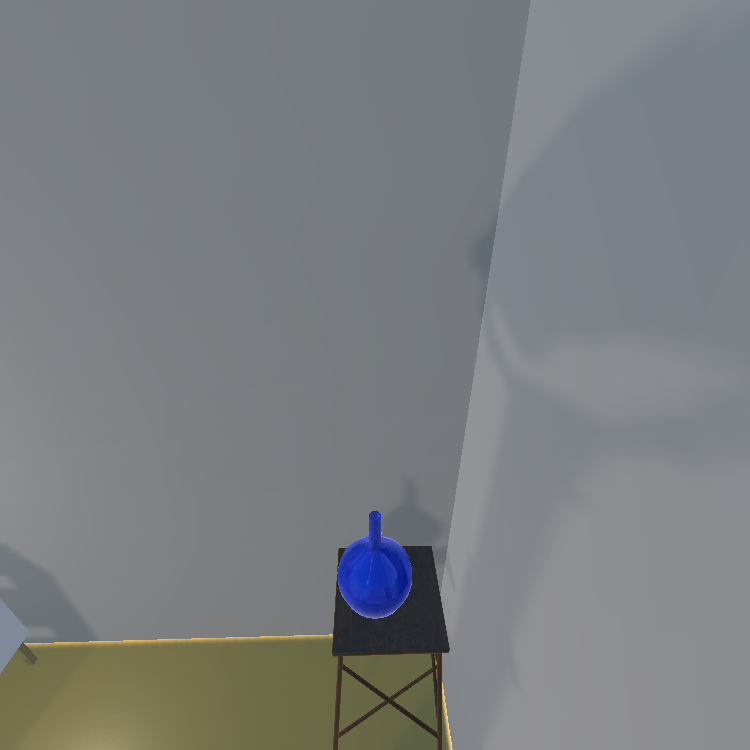

In [89]:
Image.fromarray(controller.last_event.frame)

In [90]:
frame = controller.last_event.frame
base64_string = numpy_to_base64(frame)
analyze_image(base64_string, api_key=api_key, prompt= "What's in this image? What kind of room are you in? Describe it as if you are in that room and you can directly see it.")



({'id': 'chatcmpl-AVhdmyeF8mNV7XdqLh2DepTWR0jIn',
  'object': 'chat.completion',
  'created': 1732119286,
  'model': 'gpt-4o-2024-08-06',
  'choices': [{'index': 0,
    'message': {'role': 'assistant',
     'content': "The room appears to be a simple and minimalist space. It's relatively small, with neutral-colored walls and flooring. There’s a chair in the corner with light falling on the floor beside it, creating shadows on the wall. Against the wall, there’s a small black side table or stool with a blue funnel placed on top. It's a basic setup with limited furnishings, suggesting a functional or utilitarian purpose. The overall atmosphere is calm, with simple decor and a focus on practicality.",
     'refusal': None},
    'logprobs': None,
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 801,
   'completion_tokens': 96,
   'total_tokens': 897,
   'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0},
   'completion_tokens_details': {'reasoning_tokens': 0,
    '

### Object Classification

In [111]:
matched_object = "Vase"
frame = controller.last_event.frame
base64_string = numpy_to_base64(frame)
analyze_image(base64_string, api_key=api_key, prompt= f"describe {matched_object} in great detail")

({'id': 'chatcmpl-AVhsv1PXGZQrn8WKWgf0mJmaTetTj',
  'object': 'chat.completion',
  'created': 1732120225,
  'model': 'gpt-4o-2024-08-06',
  'choices': [{'index': 0,
    'message': {'role': 'assistant',
     'content': 'The vase on the table is a simple, round design with a sleek, glossy finish that reflects light, suggesting a smooth surface. Its color blends in subtly with the surroundings, possibly a muted shade like white or light gray. The vase’s size is modest, given it fits comfortably in the center of the table without overwhelming the space. Its minimalist aesthetic complements the modern, understated decor of the room, adding an element of elegance to the dining area.',
     'refusal': None},
    'logprobs': None,
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 777,
   'completion_tokens': 90,
   'total_tokens': 867,
   'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0},
   'completion_tokens_details': {'reasoning_tokens': 0,
    'audio_tokens': 0,
  

In [109]:
matched_object = "Vase"
object_positions = get_object_positions(controller, matched_object)
for i in range(len(object_positions)):
  event = controller.step(action="GetReachablePositions")
  reachable_positions = event.metadata["actionReturn"]
  position = object_positions[i]
  event = teleport_in_front_of_object(controller, position, reachable_positions)

  frame = controller.last_event.frame
  base64_string = numpy_to_base64(frame)
  analyze_image(base64_string, api_key=api_key, prompt= f"describe {matched_object} in great detail")

  print("Was this the item you were looking for?")
  if input("Type yes if so...") == "yes":
    break


Was this the item you were looking for?
